# Анализ данных в задаче кредитного скоринга

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

-LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

-SEX: пол клиента (1 = мужской, 2 = женский )

-EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

-MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

-AGE: возраст в годах

-PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

-BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь

-PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре

-default - индикатор невозврата денежных средств

## Задание

1 Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

2 Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

3 Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

4 Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

5 Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

### Review criterialess 
Выполнение каждого пункта задания должно начинаться с графика с данными, которые вы собираетесь анализировать. Еще лучше, если вы разложите графики анализируемого фактора по переменной (default), на которую хотите изучить влияние этого фактора, и проинтерпретируете отличия в полученных распределениях.
При использовании статистических критериев необходимо убедиться в том, что условия их применимости выполняются. Например, если вы видите, что данные бинарные, то не нужно применять критерий Стьюдента.
При каждом использовании любого критерия необходимо указать, какая проверяется гипотеза, против какой альтернативы, чему равен достигаемый уровень значимости, принимается или отвергается нулевая гипотеза на уровне значимости 0.05. Если задача позволяет, нужно оценить размер эффекта и предположить, имеет ли этот результат практическую значимость.
Выполненное задание необходимо представить в ipython-ноутбука.

In [1]:
import statsmodels
import scipy 
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.multitest as smm
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



#### загрузка данных

In [3]:
raw = pd.read_csv("credit_card_default_analysis.csv", sep=",", index_col=False) 
raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
raw0=raw[raw['default']==0]
raw1=raw[raw['default']==1]

print "количество вернувших кредит ",raw0.shape[0]
print "количество не вернувших кредит ",raw1.shape[0]

количество вернувших кредит  23364
количество не вернувших кредит  6636


## 1 Размер кредитного лимита (LIMIT_BAL). 

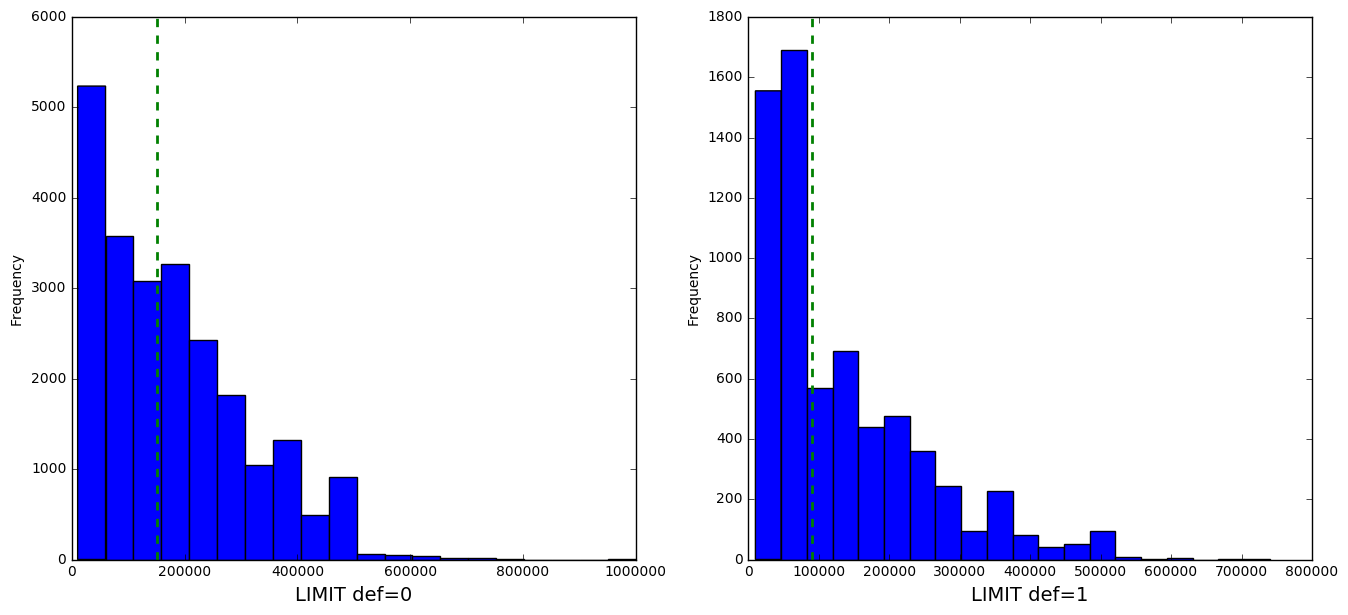

In [5]:
#Частота размеров кредитного лимита для возвратов и невозвратов и медиана

plt.figure(figsize(16,7))
plt.subplot(121)
raw0['LIMIT_BAL'].plot.hist(bins=20)
plt.xlabel('LIMIT def=0', fontsize=14)
plt.axvline(raw0['LIMIT_BAL'].median(), color='g', linestyle='dashed', linewidth=2)

plt.subplot(122)
raw1['LIMIT_BAL'].plot.hist(bins=20)
plt.xlabel('LIMIT def=1', fontsize=14)
plt.axvline(raw1['LIMIT_BAL'].median(), color='g', linestyle='dashed', linewidth=2)
pylab.show()

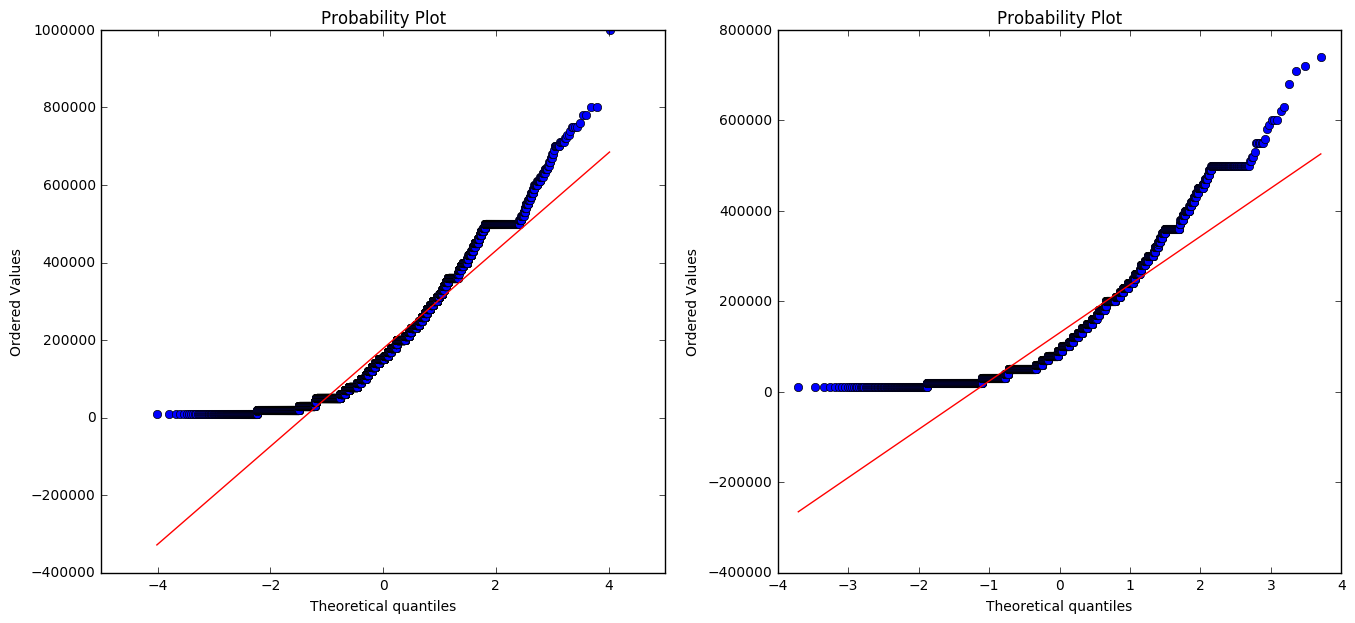

In [6]:
# распределение кредитного лимита, не наблюдается нормальности
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(raw0.LIMIT_BAL, dist="norm", plot=pylab)
plt.subplot(122)
sc.stats.probplot(raw1.LIMIT_BAL, dist="norm", plot=pylab)

pylab.show()

Выдвенем гипотезу 

$H_0\colon$ медианые значения кредитных сумм одинаковы для клиентов, вернувших кредит, и для клиентов, не вернувших кредит.

$H_1\colon$ не одинаковы.

Нам необходимо построить интервальную оценку для медианы, воспользуемся бутстрепом

In [7]:
# функции для бутстреп анализа
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [8]:
lb0 = raw0.LIMIT_BAL.values
lb1 = raw1.LIMIT_BAL.values


### Интервальная оценка медианы


In [9]:
np.random.seed(0)

lb0_median_scores = map(np.median, get_bootstrap_samples(lb0, 1000))
lb1_median_scores = map(np.median, get_bootstrap_samples(lb1, 1000))

print "95% confidence interval for the median Limit for def=0",  stat_intervals(lb0_median_scores, 0.05)
print "95% confidence interval for the median Limit for def=1",  stat_intervals(lb1_median_scores, 0.05)

95% confidence interval for the median Limit for def=0 [ 150000.  150000.]
95% confidence interval for the median Limit for def=1 [ 80000.  90000.]


Заметим что интервалы оценки медианы не пересекаются

### Интервальная оценка разности медиан

In [10]:
delta_median_scores = map(lambda x: x[0] - x[1], zip(lb0_median_scores, lb1_median_scores))

In [11]:
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [ 60000.  70000.]


Отвергаем гипотезу в пользу альтернативы

### Ранговый критерий Манна-Уитни

Проверим гипотезу о  равенстве распределений

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [12]:
stats.mannwhitneyu(lb0, lb1)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.1277429091116516e-190)

гипотеза отвергается в пользу альтернативы с вероятность 95% , так как p<0.05

# 2 Пол (SEX)

пол клиента 1 = мужской, 2 = женский 

In [13]:
def_s2=raw[raw['SEX']==2].default.values
def_s1=raw[raw['SEX']==1].default.values

In [14]:
print "Колличество женщин всего", def_s2.shape[0], "невернувших кредит" , def_s2.sum() , " % невозврата", def_s2.sum()*100./def_s2.shape[0]
print "Колличество мужчин всего", def_s1.shape[0], "невернувших кредит", def_s1.sum() , "% невозврата", def_s1.sum()*100./def_s1.shape[0]

Колличество женщин всего 18112 невернувших кредит 3763  % невозврата 20.7762809187
Колличество мужчин всего 11888 невернувших кредит 2873 % невозврата 24.1672274563


Необходимо понять значимые ли различия долей невернувших кредит

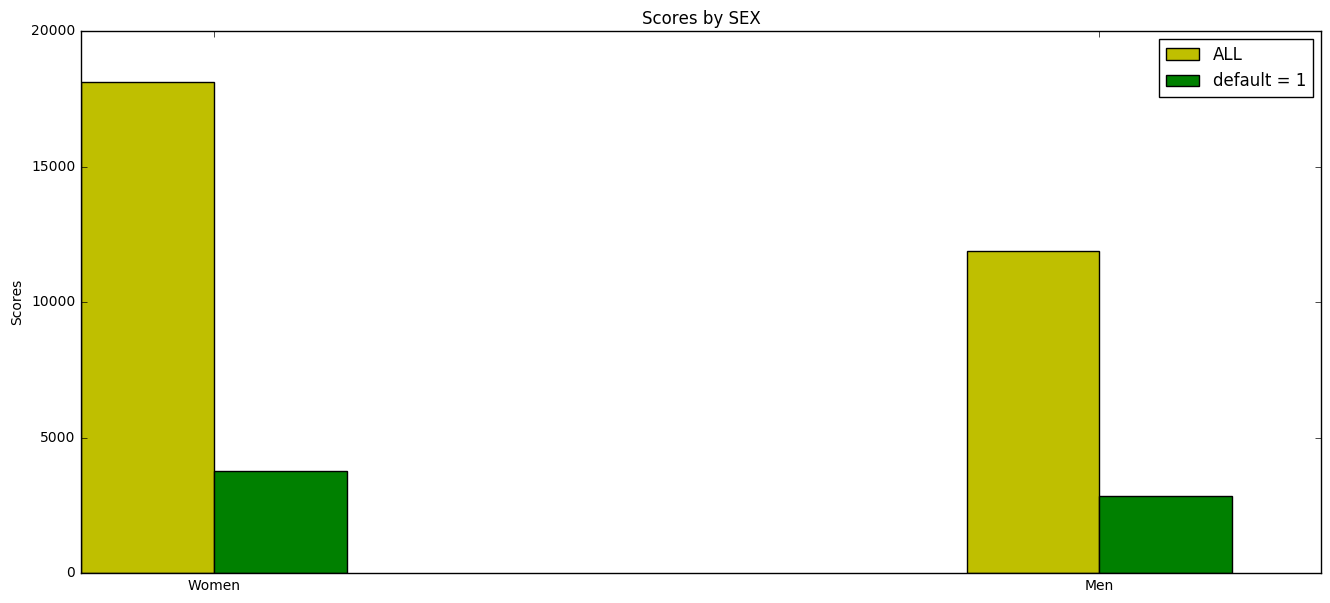

In [15]:
fig, ax = plt.subplots()
rects1=plt.bar(np.arange(2),(def_s2.shape[0],def_s1.shape[0]), 0.15, color='y')
rects2=plt.bar(np.arange(2) + 0.15, (def_s2.sum(),def_s1.sum()), 0.15, color='g')
# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by SEX')
ax.set_xticks(np.arange(2) + 0.15)
ax.set_xticklabels(('Women', 'Men'))
ax.legend((rects1[0], rects2[0]), ( 'ALL','default = 1'))

plt.show()

Нулевая гипотеза - доля невозвратов не зависит от пола.  Альтернатива - иначе.

### Z-критерий для разности долей 


In [16]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)
    

In [17]:
print "95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(def_s1,def_s2)

95% confidence interval for a difference between proportions: [0.024207, 0.043612]


In [18]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(def_s1,def_s2))

p-value: 0.000000


Делаем вывод о том, что отвергаем гипотезу на уровне значимости 0,05 о равенстве невозвратов кредита у мужчин и женщин. 

### 3 Образование (EDUCATION)

0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных

In [19]:
ed= raw[['EDUCATION','default']]

In [20]:
ed.head()

,EDUCATION,default
0,2,1
1,2,1
2,2,0
3,2,0
4,2,0


In [21]:
#new = pd.pivot_table(ed, columns=["EDUCATION"])
new2=ed.groupby(['EDUCATION','default']).default.count()
#pd.DataFrame(new2)
ed2= pd.DataFrame({'count' : ed.groupby( [ 'default','EDUCATION'] ).size()}).reset_index()

In [22]:
ed2

,default,EDUCATION,count
0,0,0,14
1,0,1,8549
2,0,2,10700
3,0,3,3680
4,0,4,116
5,0,5,262
6,0,6,43
7,1,1,2036
8,1,2,3330
9,1,3,1237


In [23]:
ct1=pd.DataFrame(ed2.pivot(index='default',columns='EDUCATION', values='count'))
print ct1
ct1.fillna(0,inplace=True)
ct10=list(ct1.ix[0, ])
ct11=list(ct1.ix[1, ])
obs1=list([ct10,ct11])


EDUCATION     0       1        2       3      4      5     6
default                                                     
0          14.0  8549.0  10700.0  3680.0  116.0  262.0  43.0
1           NaN  2036.0   3330.0  1237.0    7.0   18.0   8.0


Применим критерий Xi^2 для проверки корреляции.
Нулевая гипотеза - корреляция в категориальных переменных образования отсутсвует.

In [24]:
g, p, dof, expctd=sc.stats.chi2_contingency(obs1)
print  "p-value=" ,p

p-value= 1.23326262454e-32


Отвергаем предположение о независимости образования и невозвратов кредита.
Рассмотрим разность между ожидаемыми значениями и наблюдаемыми

In [25]:
pd.DataFrame(expctd-obs1, index = [0,1])
#print expctd-obs1

,0,1,2,3,4,5,6
0,-3.0968,-305.402,226.564,149.3596,-20.2076,-43.936,-3.2812
1,3.0968,305.402,-226.564,-149.3596,20.2076,43.936,3.2812


In [26]:
import copy
l=map(lambda x,y:y*100.0/(x+y),obs1[0],obs1[1])
obs2=copy.deepcopy(obs1)
obs2.append(l)

In [27]:
dfEd=pd.DataFrame(obs2, index = [0,1,'%'])
dfEd

,0,1,2,3,4,5,6
0,14.0,8549.000000,10700.000000,3680.000000,116.000000,262.000000,43.000000
1,0.0,2036.000000,3330.000000,1237.000000,7.000000,18.000000,8.000000
%,0.0,19.234766,23.734854,25.157616,5.691057,6.428571,15.686275


Исключим группы с малым количеством наблюдений: 0, 4,5,6. Видно, что процент не отдачи падает с ростом уровня образования
видно из графика процента неотдачи в трех группах - высшая школа, бакалавр, магистр.


In [28]:
dfEd2=dfEd[[1, 2,3]] 
dfEd2

,1,2,3
0,8549.000000,10700.000000,3680.000000
1,2036.000000,3330.000000,1237.000000
%,19.234766,23.734854,25.157616


Магистр имеет меньший процент невозвратов долга из оставленных категорий.

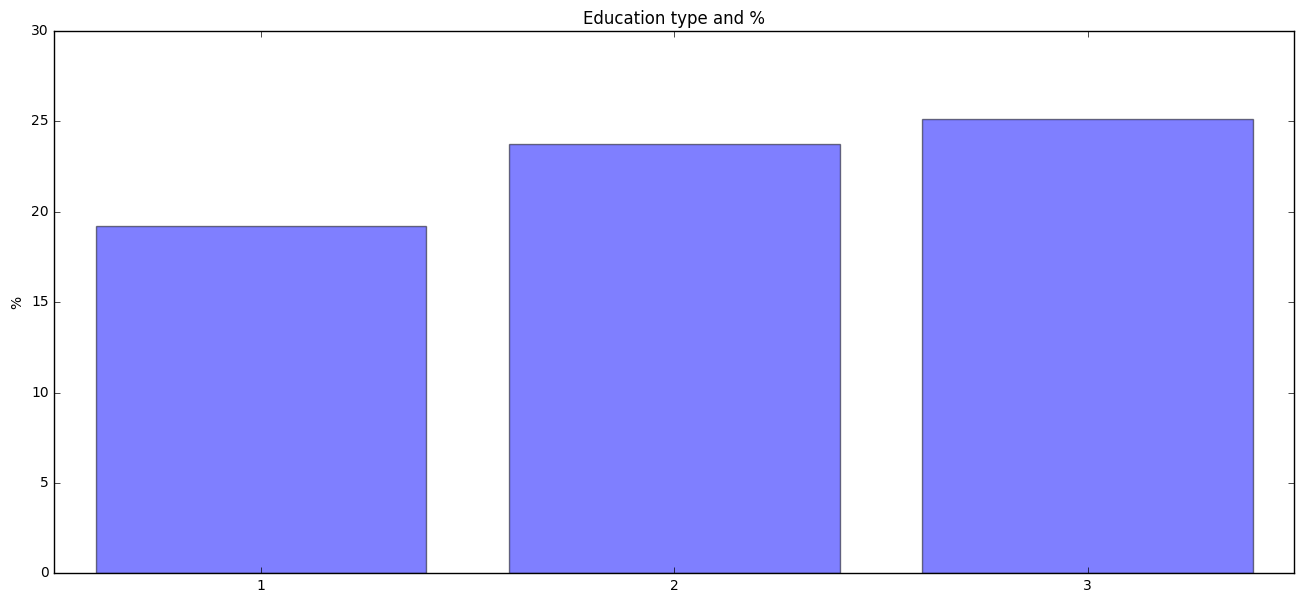

In [29]:
objects = ('1', '2', '3')
y_pos = np.arange(len(objects))
performance = [19.234766,23.734854,25.157616]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('%')
plt.title('Education type and %')
 
plt.show()

### 4 Семейное положение (MARRIAGE)
0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных

In [30]:
edm= raw[['MARRIAGE','default']]

In [31]:
new2=edm.groupby(['MARRIAGE','default']).default.count()
print new2


MARRIAGE  default
0         0             49
          1              5
1         0          10453
          1           3206
2         0          12623
          1           3341
3         0            239
          1             84
Name: default, dtype: int64


Исключим позиции "нет данных" и "отказались отвечать", так как они не информативны и имеют малые значения в общем количестве 


In [32]:
def_m1=raw[raw['MARRIAGE']==1].default.values
def_m2=raw[raw['MARRIAGE']==2].default.values

In [33]:
print "Колличество замужних\женатых всего", def_m1.shape[0], "невернувших кредит" , def_m1.sum() , "в %-м соотношении=", def_m1.sum()*100./def_m1.shape[0]
print "Колличество холостых всего", def_m2.shape[0], "невернувших кредит", def_m2.sum() , "в %-м соотношении=", def_m2.sum()*100./def_m2.shape[0]

Колличество замужних\женатых всего 13659 невернувших кредит 3206 в %-м соотношении= 23.4717036386
Колличество холостых всего 15964 невернувших кредит 3341 в %-м соотношении= 20.9283387622


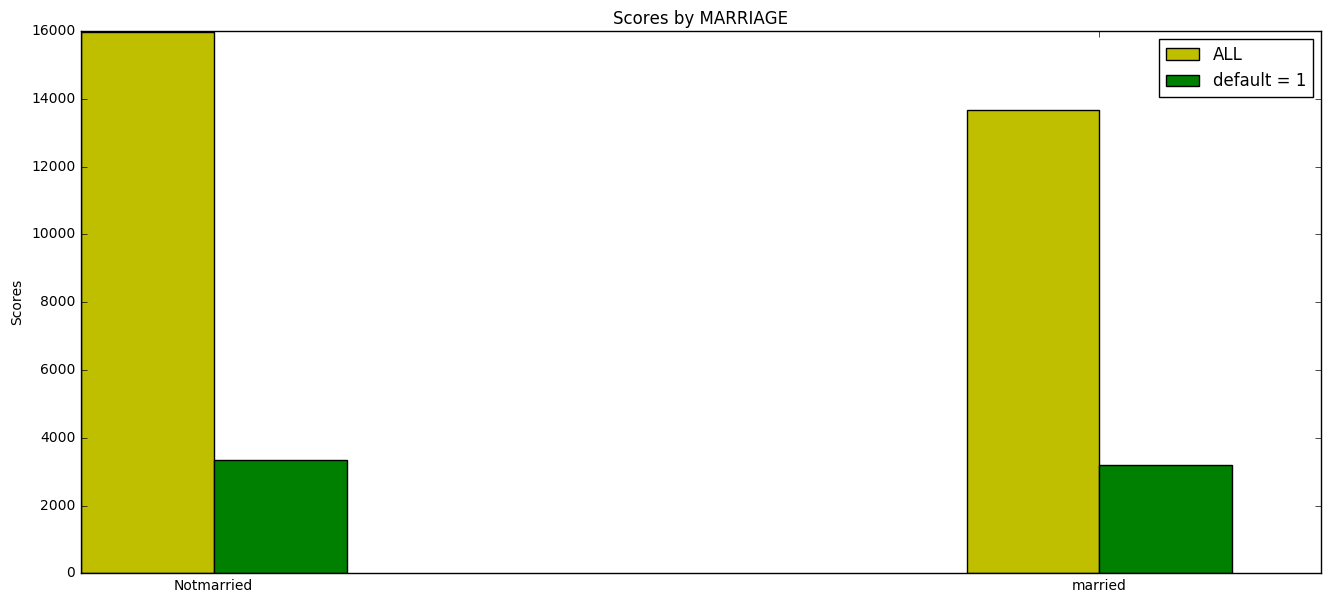

In [34]:
fig, ax = plt.subplots()
rects1=plt.bar(np.arange(2),(def_m2.shape[0],def_m1.shape[0]), 0.15, color='y')
rects2=plt.bar(np.arange(2) + 0.15, (def_m2.sum(),def_m1.sum()), 0.15, color='g')
# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by MARRIAGE')
ax.set_xticks(np.arange(2) + 0.15)
ax.set_xticklabels(('Notmarried', 'married'))
ax.legend((rects1[0], rects2[0]), ( 'ALL','default = 1'))

plt.show()

In [35]:
print "95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(def_m1,def_m2)

95% confidence interval for a difference between proportions: [0.015929, 0.034938]


In [36]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(def_m1,def_m2))

p-value: 0.000000


Отвергаем гипотезу о равенстве долей невернувших кредит в зависимости от семейного положения

## 5 Возраст (AGE)

In [37]:
raw0=raw[raw['default']==0]
raw1=raw[raw['default']==1]

print "size, def=0:",raw0.shape
print "size, def=1:",raw1.shape

size, def=0: (23364, 25)
size, def=1: (6636, 25)


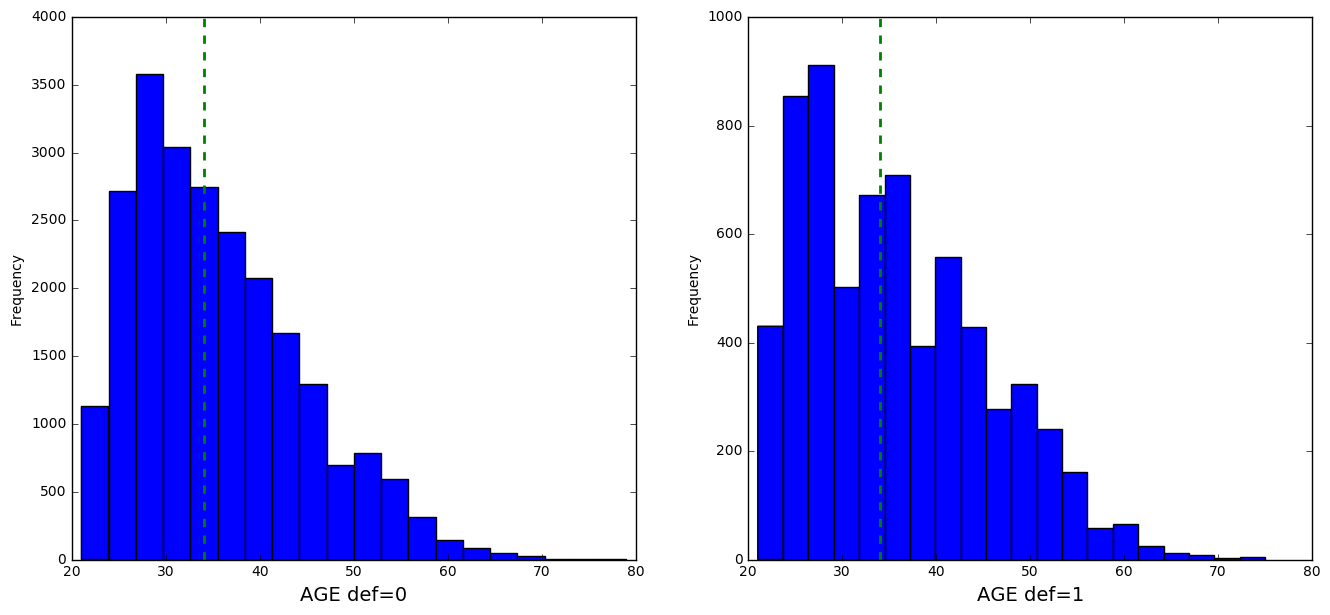

In [38]:
#Частота размеров кредитного лимита для возвратов и невозвратов и медиана

plt.figure(figsize(16,7))
plt.subplot(121)
raw0['AGE'].plot.hist(bins=20)
plt.xlabel('AGE def=0', fontsize=14)
plt.axvline(raw0['AGE'].median(), color='g', linestyle='dashed', linewidth=2)

plt.subplot(122)
raw1['AGE'].plot.hist(bins=20)
plt.xlabel('AGE def=1', fontsize=14)
plt.axvline(raw1['AGE'].median(), color='g', linestyle='dashed', linewidth=2)
pylab.show()

Выдвенем гипотезу и проверим ее
H0:  медианые значения возраста  одинаковы для клиентов, вернувших кредит, и для клиентов, не вернувших кредит.
H1:  не одинаковы.
Нам необходимо построить интервальную оценку для медианы, воспользуемся бутстрепом

In [39]:
age0 = raw0.AGE.values
age1 = raw1.AGE.values

In [40]:
np.random.seed(0)

a0_median_scores = map(np.median, get_bootstrap_samples(age0, 1000))
a1_median_scores = map(np.median, get_bootstrap_samples(age1, 1000))

print "95% confidence interval for the median Limit for def=0",  stat_intervals(a0_median_scores, 0.05)
print "95% confidence interval for the median Limit for def=1",  stat_intervals(a1_median_scores, 0.05)

95% confidence interval for the median Limit for def=0 [ 34.  34.]
95% confidence interval for the median Limit for def=1 [ 34.  35.]


In [41]:
delta_median_scores = map(lambda x: x[0] - x[1], zip(a0_median_scores, a1_median_scores))

In [42]:
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [-1.  0.]


отвергнуть гипотезу на уровен значисоти 0,05 о равенстве возрастов мы не можем